<a href="https://colab.research.google.com/github/ajinkyajumde/GERMAN_BOND/blob/main/GERMAN_BOND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


import pandas as pd
from datetime import datetime


1. Importing the data from local drive

In [198]:
path='/content/drive/MyDrive/Almabetter projects/german bond analysis/German 10 YR Bund Futures Historical Data.csv'
df=pd.read_csv(path)

In [199]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 15, 2022",144.61,142.73,145.51,142.25,1.29M,0.71%
1,"Jun 14, 2022",143.59,144.65,145.58,142.29,1.26M,-1.10%
2,"Jun 13, 2022",145.18,146.71,147.19,144.19,1.10M,-1.22%
3,"Jun 10, 2022",146.98,147.74,148.51,146.61,956.29K,-0.55%
4,"Jun 09, 2022",147.80,148.69,149.43,147.32,1.04M,-0.79%


2. Move the price column after the low column but before vol and change % column

In [200]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [201]:
df=df[['Date', 'Open', 'High', 'Low', 'Price', 'Vol.', 'Change %']]

In [202]:
df.head()

,Date,Open,High,Low,Price,Vol.,Change %
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%


In [203]:
df.rename(columns={'Price':'Close'},inplace=True)

In [204]:
df.head()

,Date,Open,High,Low,Close,Vol.,Change %
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%


In [205]:
high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(14).sum()/14
df['atr'] = true_range.rolling(14).sum()/14

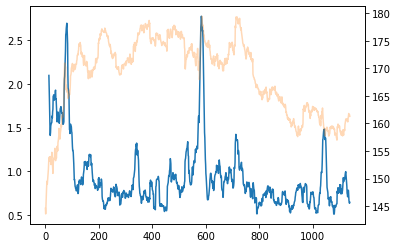

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
atr.plot(ax=ax)
df['Close'].plot(ax=ax, secondary_y=True, alpha=0.3)

plt.show()


In [207]:
df.head(20)

,Date,Open,High,Low,Close,Vol.,Change %,atr
0,"Jun 15, 2022",142.73,145.51,142.25,144.61,1.29M,0.71%,NaN
1,"Jun 14, 2022",144.65,145.58,142.29,143.59,1.26M,-1.10%,NaN
2,"Jun 13, 2022",146.71,147.19,144.19,145.18,1.10M,-1.22%,NaN
3,"Jun 10, 2022",147.74,148.51,146.61,146.98,956.29K,-0.55%,NaN
4,"Jun 09, 2022",148.69,149.43,147.32,147.80,1.04M,-0.79%,NaN
5,"Jun 08, 2022",149.15,149.30,148.87,148.98,7.61K,-0.37%,NaN
6,"Jun 07, 2022",148.99,149.62,148.68,149.53,131.19K,0.39%,NaN
7,"Jun 06, 2022",149.75,150.13,148.91,148.95,578.36K,-0.45%,NaN
8,"Jun 03, 2022",150.13,150.35,149.57,149.63,875.62K,-0.42%,NaN
9,"Jun 02, 2022",150.99,151.09,150.06,150.26,1.14M,-0.50%,NaN


In [208]:
window=int(input('ENTER THE WINDOW FOR MOVING STANDARD DEVIATION'))

ENTER THE WINDOW FOR MOVING STANDARD DEVIATION10


In [209]:
df['roll']=df['Close'].rolling(window).std()

In [210]:
df.tail()

,Date,Open,High,Low,Close,Vol.,Change %,atr,roll
1134,"Jan 08, 2018",161.64,162.04,161.39,161.80,454.69K,0.13%,0.712143,0.473780
1135,"Jan 05, 2018",161.70,161.87,161.50,161.59,467.09K,0.00%,0.660714,0.530476
1136,"Jan 04, 2018",161.44,161.75,161.26,161.59,640.61K,0.01%,0.638571,0.559008
1137,"Jan 03, 2018",161.26,161.82,161.20,161.58,604.24K,0.19%,0.630714,0.583401
1138,"Jan 02, 2018",161.78,161.78,161.18,161.28,485.60K,-0.25%,0.642143,0.576218


In [211]:
df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df1.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [212]:
import plotly.graph_objects as go


import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(
    autosize=False,
    width=1800,
    height=800,)

fig.show()